In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract


In [2]:
import os
import tempfile
from pdf2image import convert_from_path 

Path = 'file1_1.pdf'

if os.path.isfile(Path):
    File_Name = os.path.basename(Path)
    Name = File_Name.split('.')[-2]
    Page_No = int(Name.split('_')[-1])
    print(Page_No)
    
temp_path = 'temp/'
with tempfile.TemporaryDirectory() as temp_path:
    pages = convert_from_path(Path, dpi=300, output_folder=temp_path)
    page = pages[Page_No-1]
    filename = "pdf_png_"+str(Page_No)+".png"
    # Save the image of the page in system 
    page.save(filename, 'PNG')

1


In [3]:
#read your file
img = cv2.imread(filename,0)
img.shape


(3505, 2480)

In [4]:
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [5]:
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)

In [6]:
#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('cv_inverted.png',img_bin)

True

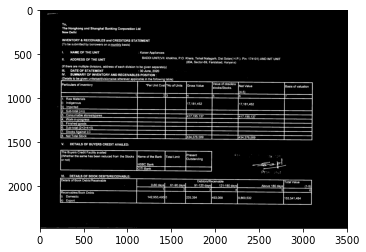

In [7]:
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

In [8]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
kernel_len

35

In [9]:
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
ver_kernel.shape

(35, 1)

In [10]:
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
hor_kernel.shape

(1, 35)

In [11]:
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
kernel

array([[1, 1],
       [1, 1]], dtype=uint8)

In [12]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("vertical.jpg",vertical_lines)

True

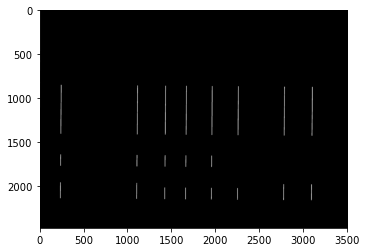

In [13]:
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

In [14]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("horizontal.jpg",horizontal_lines)

True

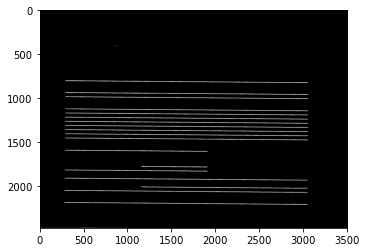

In [15]:
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

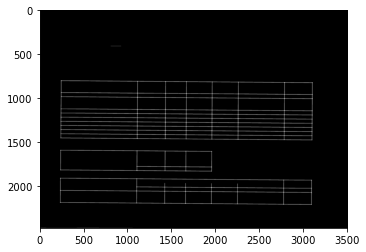

In [16]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
plotting = plt.imshow(img_vh,cmap='gray')
plt.show()

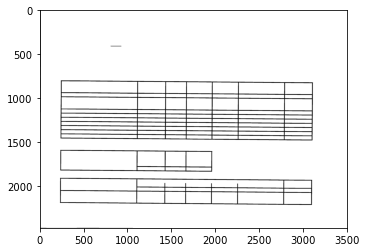

In [17]:
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_vh.jpg", img_vh)
plotting = plt.imshow(img_vh,cmap='gray')
plt.show()

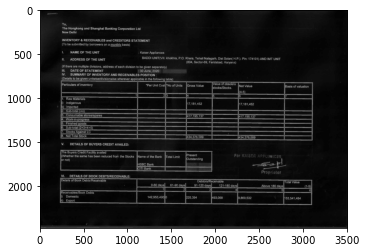

In [18]:
bitxor = cv2.bitwise_xor(img,img_vh)

#Plotting the generated image
plotting = plt.imshow(bitxor,cmap='gray')
plt.show()

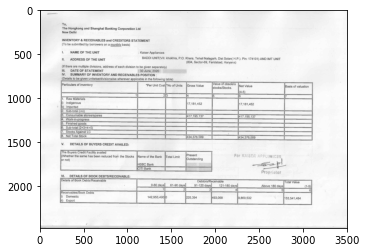

In [19]:
bitnot = cv2.bitwise_not(bitxor)

#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [20]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [22]:
# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

In [23]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
heights

[2480,
 7,
 685,
 132,
 129,
 128,
 129,
 128,
 131,
 128,
 45,
 41,
 41,
 41,
 42,
 43,
 41,
 136,
 132,
 132,
 131,
 131,
 134,
 131,
 45,
 41,
 41,
 40,
 41,
 43,
 41,
 46,
 41,
 40,
 41,
 41,
 44,
 41,
 45,
 41,
 41,
 41,
 42,
 43,
 41,
 45,
 41,
 40,
 41,
 41,
 43,
 40,
 46,
 41,
 41,
 40,
 41,
 43,
 41,
 46,
 42,
 40,
 41,
 42,
 43,
 41,
 47,
 41,
 40,
 41,
 40,
 43,
 41,
 250,
 223,
 171,
 171,
 171,
 42,
 40,
 40,
 310,
 137,
 98,
 85,
 41,
 40,
 41,
 40,
 43,
 41,
 135,
 131,
 130,
 130,
 130,
 132,
 130]

In [24]:
#Get mean of heights
mean = np.mean(heights)
print(mean)

# mode 
from scipy import stats
mod = stats.mode(heights)
print(mod)
mod = int(mod.mode)


104.61224489795919
ModeResult(mode=array([41]), count=array([31]))


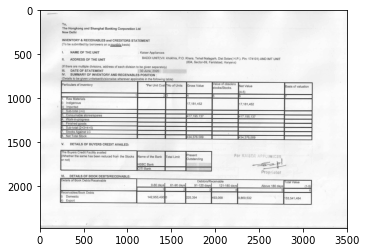

In [25]:
#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.show()

In [26]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mod/2):
        #if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
print(column)
print(row)


[[237, 2057, 860, 135], [1105, 2064, 312, 131], [1425, 2067, 229, 130], [1662, 2069, 285, 130], [1955, 2072, 290, 130], [2252, 2074, 518, 132], [2778, 2078, 308, 130]]
[[[802, 407, 125, 7]], [[247, 810, 861, 132], [1116, 816, 311, 129], [1435, 819, 229, 128], [1672, 820, 285, 129], [1965, 823, 290, 128], [2263, 825, 517, 131], [2788, 830, 308, 128]], [[247, 944, 860, 45], [1116, 951, 310, 41], [1434, 953, 229, 41], [1671, 955, 285, 41], [1965, 957, 289, 42], [2262, 960, 517, 43], [2788, 964, 307, 41]], [[245, 991, 861, 136], [1114, 998, 312, 132], [1434, 1000, 229, 132], [1670, 1003, 285, 131], [1964, 1005, 289, 131], [2261, 1007, 518, 134], [2787, 1012, 308, 131]], [[245, 1129, 860, 45], [1114, 1136, 310, 41], [1433, 1138, 228, 41], [1670, 1141, 285, 40], [1964, 1143, 288, 41], [2261, 1145, 517, 43], [2786, 1150, 308, 41]], [[245, 1176, 860, 46], [1113, 1183, 311, 41], [1433, 1186, 228, 40], [1670, 1188, 284, 41], [1964, 1190, 287, 41], [2261, 1192, 516, 44], [2786, 1197, 308, 41]], [

In [27]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [28]:
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()


In [29]:
#Regarding the distance to the columns center, the boxes are arranged in respective order
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)
    
finalboxes

[[[[802, 407, 125, 7]], [], [], [], [], [], []],
 [[[247, 810, 861, 132]],
  [[1116, 816, 311, 129]],
  [[1435, 819, 229, 128]],
  [[1672, 820, 285, 129]],
  [[1965, 823, 290, 128]],
  [[2263, 825, 517, 131]],
  [[2788, 830, 308, 128]]],
 [[[247, 944, 860, 45]],
  [[1116, 951, 310, 41]],
  [[1434, 953, 229, 41]],
  [[1671, 955, 285, 41]],
  [[1965, 957, 289, 42]],
  [[2262, 960, 517, 43]],
  [[2788, 964, 307, 41]]],
 [[[245, 991, 861, 136]],
  [[1114, 998, 312, 132]],
  [[1434, 1000, 229, 132]],
  [[1670, 1003, 285, 131]],
  [[1964, 1005, 289, 131]],
  [[2261, 1007, 518, 134]],
  [[2787, 1012, 308, 131]]],
 [[[245, 1129, 860, 45]],
  [[1114, 1136, 310, 41]],
  [[1433, 1138, 228, 41]],
  [[1670, 1141, 285, 40]],
  [[1964, 1143, 288, 41]],
  [[2261, 1145, 517, 43]],
  [[2786, 1150, 308, 41]]],
 [[[245, 1176, 860, 46]],
  [[1113, 1183, 311, 41]],
  [[1433, 1186, 228, 40]],
  [[1670, 1188, 284, 41]],
  [[1964, 1190, 287, 41]],
  [[2261, 1192, 516, 44]],
  [[2786, 1197, 308, 41]]],
 [[[244,

In [30]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                print(out)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)


Particulars of inventory

*Per Unit Cost

 

*No of Units

Gross Value

Value of obsolete
stocks/Stocks.

Net Value
(4-5) ri

Basis of valuation




4




1. Raw Materials
i) Indigenous

ii) Imported



17,181,452


17,181,452


2. Sub-total (i+ii)







3. Consumable stores/spares |



417,195,137


417,195,137


4. Work-in-progress |







5. Finished goods







6. Sub-total (2+3+4+5)







7. Stocks Against LC







 

8. Net Total Stock



434,376,589


434,376,589


The Buyers Credit Facility availed
(Whether the same has been reduced from the Stocks
or not)

Name of the Bank

HSBC Bank

Total Limit

Present
Outstanding

CITI Bank



Details of Book Debts/Receivable

Total Value
(1-5)







Receivables/Book Debts
i) Domestic

li) Export x

142,953,490


225,394

493,068

 

9,869,532

153,541,484



In [31]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
#print(dataframe)
dataframe


,0,1,2,3,4,5,6
0,,,,,,,
1,Particulars of inventory\n,*Per Unit Cost\n,\n\n*No of Units\n,Gross Value\n,Value of obsolete\nstocks/Stocks.\n,Net Value\n(4-5) ri\n,Basis of valuation\n
2,,,,4\n,,,
3,1. Raw Materials\ni) Indigenous\n\nii) Import...,,,"17,181,452\n",,"17,181,452\n",
4,2. Sub-total (i+ii)\n,,,,,,
5,3. Consumable stores/spares |\n,,,"417,195,137\n",,"417,195,137\n",
6,4. Work-in-progress |\n,,,,,,
7,5. Finished goods\n,,,,,,
8,6. Sub-total (2+3+4+5)\n,,,,,,
9,7. Stocks Against LC\n,,,,,,


In [32]:
# removing the extra "\n"
for col in dataframe.columns:
    dataframe[col] = dataframe[col].str.replace('\n'," ")

In [33]:
dataframe

,0,1,2,3,4,5,6
0,,,,,,,
1,Particulars of inventory,*Per Unit Cost,*No of Units,Gross Value,Value of obsolete stocks/Stocks.,Net Value (4-5) ri,Basis of valuation
2,,,,4,,,
3,1. Raw Materials i) Indigenous ii) Imported,,,"17,181,452",,"17,181,452",
4,2. Sub-total (i+ii),,,,,,
5,3. Consumable stores/spares |,,,"417,195,137",,"417,195,137",
6,4. Work-in-progress |,,,,,,
7,5. Finished goods,,,,,,
8,6. Sub-total (2+3+4+5),,,,,,
9,7. Stocks Against LC,,,,,,


In [34]:
data = dataframe.style.set_properties(align="right")
data

,0,1,2,3,4,5,6
0,,,,,,,
1,Particulars of inventory,*Per Unit Cost,*No of Units,Gross Value,Value of obsolete stocks/Stocks.,Net Value (4-5) ri,Basis of valuation
2,,,,4,,,
3,1. Raw Materials i) Indigenous ii) Imported,,,"17,181,452",,"17,181,452",
4,2. Sub-total (i+ii),,,,,,
5,3. Consumable stores/spares |,,,"417,195,137",,"417,195,137",
6,4. Work-in-progress |,,,,,,
7,5. Finished goods,,,,,,
8,6. Sub-total (2+3+4+5),,,,,,
9,7. Stocks Against LC,,,,,,


In [35]:
#Converting it in a excel-file
#dataframe.to_excel("output.xlsx") # IllegalCharacterError
dataframe.to_csv("output.csv")